In [1]:
from datascience import *
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# The Burrito Food Cart

In 1990, Mr. A decided to invest in a Mexican food cart in Manhattan. He would work 5 days a week from 11:30 AM to 1:30 PM. His focus was to sell the best burritos in town. In the neighborhood, he remained the only burrito cart owner for 4 years, until 1995, when a competitor, Mr. B, decided to open up another burrito cart in the neighborhood. Mr. B was able to build a name very fast. People liked his burritos much more and with time, he became people's #1 choice. In 2000, two new burrito carts opened and 5 years later the fifth one opened. These last carts used to sell their burritos for much less but were never able to offer burritos that were as tasty as those offered by Mr. B. By then, Mr. A was unable to compete anymore; he neither had a price nor quality advantage and decided to shut down his business in 2008. To see each cart's market share from 1990 - 2010, load the following file into a table: `marketshare.csv`

Q1. For simplicity, relabel the "Market Share" column to MS. Also, show the first five lines of the table.

In [2]:
MarketShare = Table.read_table("marketshare.csv")
MarketShare

Year,Cart,Market Share
1990,A,1
1991,A,1
1992,A,1
1993,A,1
1994,A,0.8
1994,B,0.2
1995,A,0.5
1995,B,0.5
1996,A,0.4
1996,B,0.6


In [3]:
MarketShare = MarketShare.relabeled('Market Share', 'MS')
MarketShare.show()

Year,Cart,MS
1990,A,1
1991,A,1
1992,A,1
1993,A,1
1994,A,0.8
1994,B,0.2
1995,A,0.5
1995,B,0.5
1996,A,0.4
1996,B,0.6


In [4]:
MarketShare.show(5)

Year,Cart,MS
1990,A,1
1991,A,1
1992,A,1
1993,A,1
1994,A,0.8


Q2. Verify that every year, the total market share of all opened carts for that year adds up to 1. 

In [5]:
MarketShare1 = MarketShare.select('Year', 'MS').group('Year', np.sum)
MarketShare1.show()

Year,MS sum
1990,1
1991,1
1992,1
1993,1
1994,1
1995,1
1996,1
1997,1
1998,1
1999,1


Q3. The table below shows daily demand:

| Year | Daily Demand | 
|------|--------------|
| 1990 |      100     | 
| 1991 |      110     | 
| 1992 |      120     | 
| 1993 |      130     | 
| 1994 |      140     |
| .... |      ...     |

and would increase by 10 customers every year. Create a new table which gives the annual customer demand for burritos in the neighborhood where the carts stand. You can assume 5 days/week and 50 weeks/year. This table should contain all the years where market share are recorded as in marketshare.csv.


In [6]:
AnnualDemand = Table().with_columns(
 'Year', np.arange(1990, 2011,1), 'Annual Demand', np.arange(100, (100+((2010-1990)*10)+1),10)*5*50)
AnnualDemand.show()

Year,Annual Demand
1990,25000
1991,27500
1992,30000
1993,32500
1994,35000
1995,37500
1996,40000
1997,42500
1998,45000
1999,47500


Q4. Assume that Mr. A and Mr. B sell their burritos for $\$4$, while the other carts offer their burritos for only \$3. Using the market share and demand data, calculate the annual profit for each cart, where profit is (revenue - cost) and the table below shows how much it costs each of the cart owners to make a burrito. Do all necessary calculations, but your final table should have 3 columns with the following labels: Year, Cart and Annual Profit

| Cart | Cost | 
|------|------|
|  A   |  2   | 
|  B   | 2.5  | 
|  C   | 1.5  | 
|  D   | 1.8  | 
|  E   | 1.3  |

In [7]:
proa=4-2
prob=4-2.5
proc=3-1.5
prod=3-1.8
proe=3-1.3
Q4 = MarketShare.pivot('Cart','Year', values='MS',collect=max)
Q4= Q4.join("Year", AnnualDemand, 'Year')
Q4 = Q4.with_columns("A", 
                       Q4.column('A')*Q4.column('Annual Demand')*proa)
Q4 = Q4.with_columns("B", 
                       Q4.column('B')*Q4.column('Annual Demand')*prob)
Q4 = Q4.with_columns("C", 
                       Q4.column('C')*Q4.column('Annual Demand')*proc)
Q4 = Q4.with_columns("D", 
                       Q4.column('D')*Q4.column('Annual Demand')*prod)
Q4 = Q4.with_columns("E", 
                       Q4.column('E')*Q4.column('Annual Demand')*proe)
Q4.show()


Year,A,B,C,D,E,Annual Demand
1990,50000,0,0,0,0,25000
1991,55000,0,0,0,0,27500
1992,60000,0,0,0,0,30000
1993,65000,0,0,0,0,32500
1994,56000,10500,0,0,0,35000
1995,37500,28125,0,0,0,37500
1996,32000,36000,0,0,0,40000
1997,34000,38250,0,0,0,42500
1998,36000,40500,0,0,0,45000
1999,38000,42750,0,0,0,47500


In [8]:
Q4=Q4.drop('Annual Demand').stack('Year')
Q4=Q4.where('value',are.not_equal_to(0))
Q4 = Q4.relabeled('value', 'Annual Profit')
Q4 = Q4.relabeled('column', 'Cart')
Q4.show()

Year,Cart,Annual Profit
1990,A,50000
1991,A,55000
1992,A,60000
1993,A,65000
1994,A,56000
1994,B,10500
1995,A,37500
1995,B,28125
1996,A,32000
1996,B,36000


Q5. Which cart was able to generate the highest annual profit and for which year? 

In [9]:
Q4.sort('Annual Profit', descending=True).take(0)

Year,Cart,Annual Profit
1993,A,65000


In [10]:
print("A was able to generate the highest annual profit.\nIt's for 1993.")

A was able to generate the highest annual profit.
It's for 1993.


Q6. Which cart was able to generate the highest average annual revenue?

In [11]:
Q6 = MarketShare.pivot('Cart','Year', values='MS',collect=max)
Q6= Q6.join("Year", AnnualDemand, 'Year')
Q6 = Q6.with_columns("A", Q6.column('A')*Q6.column('Annual Demand')*4)
Q6 = Q6.with_columns("B", Q6.column('B')*Q6.column('Annual Demand')*4)
Q6 = Q6.with_columns("C", Q6.column('C')*Q6.column('Annual Demand')*3)
Q6 = Q6.with_columns("D",  Q6.column('D')*Q6.column('Annual Demand')*3)
Q6 = Q6.with_columns("E",  Q6.column('E')*Q6.column('Annual Demand')*3)
Q6=Q6.drop('Annual Demand').stack('Year')
Q6=Q6.where('value',are.not_equal_to(0))
Q6 = Q6.relabeled('value', 'Annual Revenue')
Q6=Q6.drop('Year').group('column', np.mean)
Q6=Q6.relabeled('column', 'Cart')
Q6.show()

Cart,Annual Revenue mean
A,66416.7
B,88970.6
C,40534.1
D,38454.5
E,41687.5


In [12]:
Q6.sort('Annual Revenue mean', descending=True).take(0)

Cart,Annual Revenue mean
B,88970.6


In [13]:
print(" B was able to generate the highest average annual revenue")

 B was able to generate the highest average annual revenue


Q7. If you were the owner of cart A, would you have shut down the business? Explain your answer using the data.

In [14]:
Q71= MarketShare.where('Cart',are.equal_to("A")).show()
Q72= Q4.where('Cart',are.equal_to("A")).show()

Year,Cart,MS
1990,A,1
1991,A,1
1992,A,1
1993,A,1
1994,A,0.8
1995,A,0.5
1996,A,0.4
1997,A,0.4
1998,A,0.4
1999,A,0.4


Year,Cart,Annual Profit
1990,A,50000
1991,A,55000
1992,A,60000
1993,A,65000
1994,A,56000
1995,A,37500
1996,A,32000
1997,A,34000
1998,A,36000
1999,A,38000


In [15]:
print("If I were the owner of cart A, I would have shut down the business. Because when we look at the Tables above, I find that the marketshare \nand annual profit of A are becoming smaller and at the year of 2007 they became too small that it is hard for A to make profit. ")

If I were the owner of cart A, I would have shut down the business. Because when we look at the Tables above, I find that the marketshare 
and annual profit of A are becoming smaller and at the year of 2007 they became too small that it is hard for A to make profit. 


Q8. In which year did Cart E make the most profit?

In [16]:
Q8 = Q4.where('Cart', are.equal_to("E"))
Q8 = Q8.sort('Annual Profit', descending = True).take(0)
Q8.show()
print(" 2008 is the year Cart E make the most profit.")

Year,Cart,Annual Profit
2009,E,30812.5


 2008 is the year Cart E make the most profit.


Q9. Create a matrix that shows the annual profits of each cart. Each row is a year, while each column represents a cart and the cell entry holds the annual profit. 

In [17]:
Q4 = MarketShare.pivot('Cart','Year', values='MS',collect=max)
Q4= Q4.join("Year", AnnualDemand, 'Year')
Q4 = Q4.with_columns("A", 
                       Q4.column('A')*Q4.column('Annual Demand')*proa)
Q4 = Q4.with_columns("B", 
                       Q4.column('B')*Q4.column('Annual Demand')*prob)
Q4 = Q4.with_columns("C", 
                       Q4.column('C')*Q4.column('Annual Demand')*proc)
Q4 = Q4.with_columns("D", 
                       Q4.column('D')*Q4.column('Annual Demand')*prod)
Q4 = Q4.with_columns("E", 
                       Q4.column('E')*Q4.column('Annual Demand')*proe)
Q4 = Q4.drop('Annual Demand')
Q9 = Q4
Q9.show()


Year,A,B,C,D,E
1990,50000,0,0,0,0
1991,55000,0,0,0,0
1992,60000,0,0,0,0
1993,65000,0,0,0,0
1994,56000,10500,0,0,0
1995,37500,28125,0,0,0
1996,32000,36000,0,0,0
1997,34000,38250,0,0,0
1998,36000,40500,0,0,0
1999,38000,42750,0,0,0


# Unemployment 

The Federal Reserve Bank of St. Louis publishes data about jobs in the US. Load the file `unemployment.csv` for data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate. Among people who are able to work and are looking for a full-time job:

1. NEI is the percentage who can't find a job (Non-Employment Index).
2. PTER is the percentage of those are only working at a part-time job ( Part-Time for Economic Reasons). 

Our data has a column for NEI and a columnd for NEI-PTER, which is the combined percentage of both groups. 

Q1. Create a table which containts data for the top 10 quarters, where the Non-Employment Index was highest.

In [18]:
unemployment = Table.read_table('unemployment.csv')

unemployment = unemployment.sort('NEI', descending = True).take(np.arange(10))
unemployment.show()

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


Q2. Create a table which only contains information for Years 2000-2005.

In [19]:
Q2 = Table.read_table('unemployment.csv')
Q2 = Q2.where('Date', are.between('2000', '2006'))
Q2.show()

Date,NEI,NEI-PTER
2000-01-01,7.6128,8.3379
2000-04-01,7.6754,8.4199
2000-07-01,7.6915,8.4458
2000-10-01,7.6769,8.4192
2001-01-01,7.757,8.4969
2001-04-01,8.0353,8.804
2001-07-01,8.1444,8.9862
2001-10-01,8.6782,9.6705
2002-01-01,9.0119,9.93
2002-04-01,8.9295,9.8924


Q3. It is believed that many people became PTER in the "Great Recession" of 2008-2009 and so the PTER became very high during those quarters. Does the data show reasonable evidence for such assumption? Explain your answer.

In [20]:
Q3 = Table.read_table('unemployment.csv')
Q3 = Q3.with_columns("PTER", 
                         Q3.column('NEI-PTER')-Q3.column('NEI'))
Q3.show()

Date,NEI,NEI-PTER,PTER
1994-01-01,10.0974,11.172,1.0746
1994-04-01,9.6239,10.7883,1.1644
1994-07-01,9.3276,10.4831,1.1555
1994-10-01,9.1071,10.2361,1.129
1995-01-01,8.9693,10.1832,1.2139
1995-04-01,9.0314,10.1071,1.0757
1995-07-01,8.9802,10.1084,1.1282
1995-10-01,8.9932,10.1046,1.1114
1996-01-01,9.0002,10.0531,1.0529
1996-04-01,8.9038,9.9782,1.0744


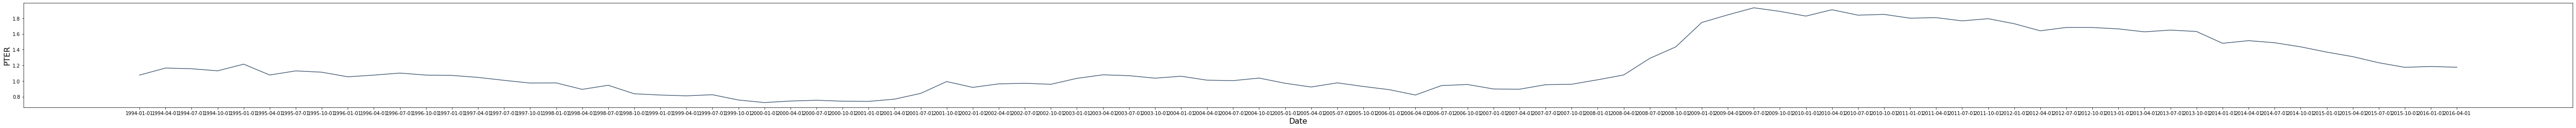

In [21]:
Q3.plot('Date', 'PTER', width = 95)

In [22]:
print('The "Great Recession" did affect the PTER, but the PTER are not so much high during 2008-01-01 to 2008-04-01 and it kept \nhigh after 2009. It seems that it has some delay on the data. In all, the "Great Recession" might be a reason that the PTER became higher and higher in 2008, and kept high during 2009. ')

The "Great Recession" did affect the PTER, but the PTER are not so much high during 2008-01-01 to 2008-04-01 and it kept 
high after 2009. It seems that it has some delay on the data. In all, the "Great Recession" might be a reason that the PTER became higher and higher in 2008, and kept high during 2009. 
